<a href="https://colab.research.google.com/github/annabohrer/Data-Science/blob/main/Anna_Bohrer_Stats_Final_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas

In [55]:
%%capture
!pip install wandb                                                              #importing outside programs into python
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [56]:
def GPU(data):                                                                                      #setting these up to read the data in the url
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [57]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();                                                                   #labels of the items

In [58]:
url = "https://docs.google.com/presentation/d/15nYVSAkK0PL4o0lWGJhubZcN4j_1iHmskbqk8JLFHRU/edit#slide=id.p"         #the url that we are pulling data from

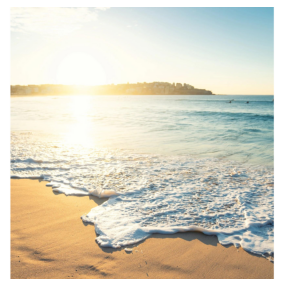

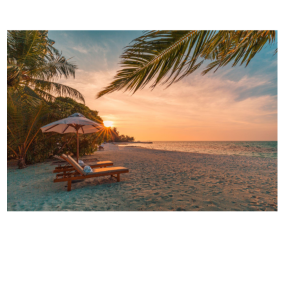

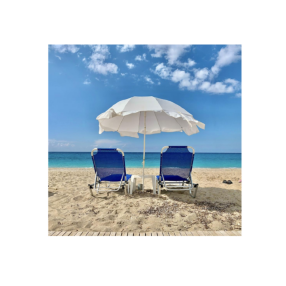

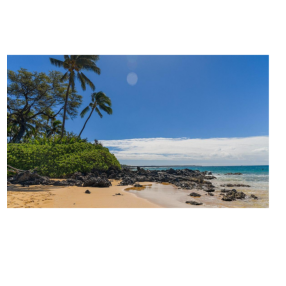

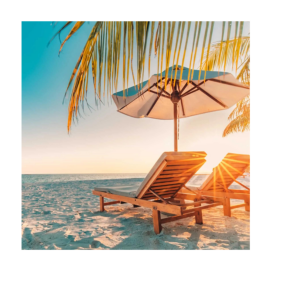

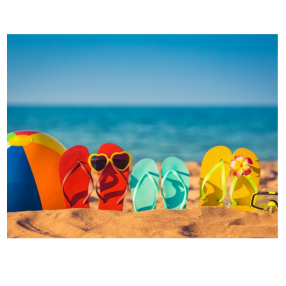

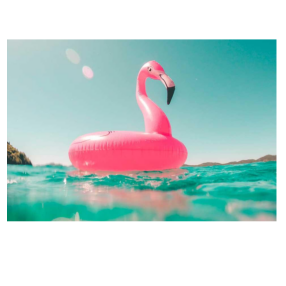

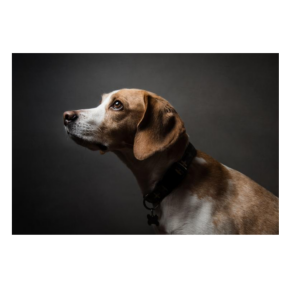

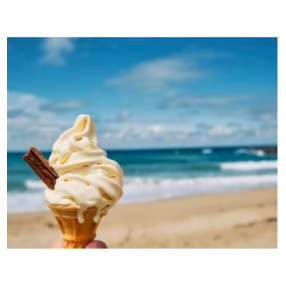

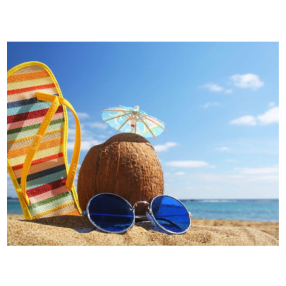

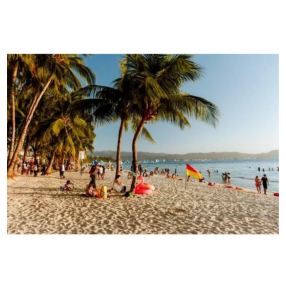

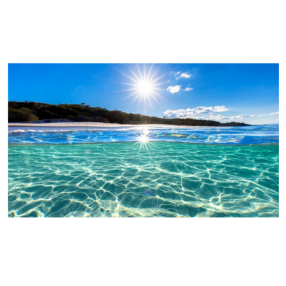

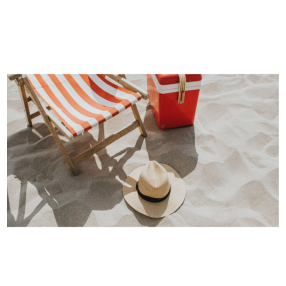

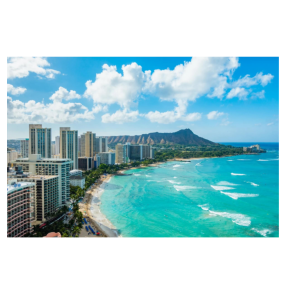

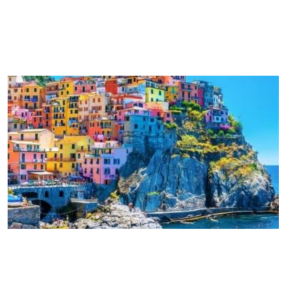

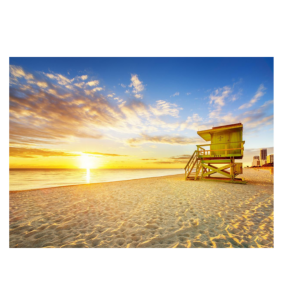

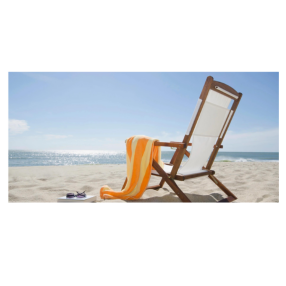

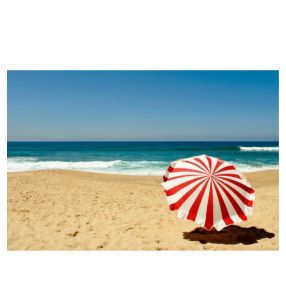

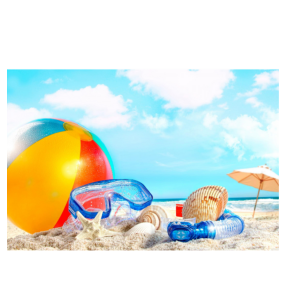

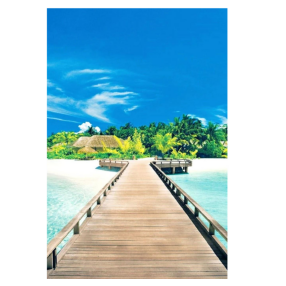

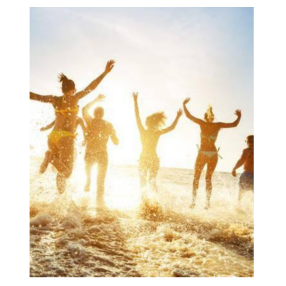

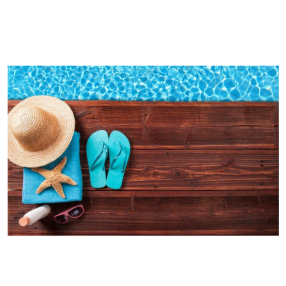

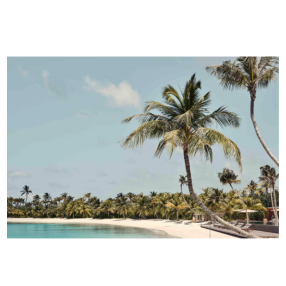

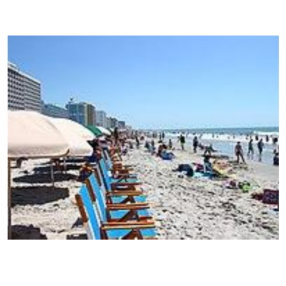

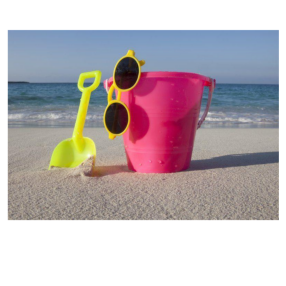

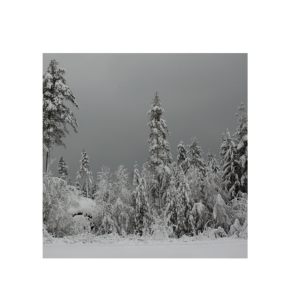

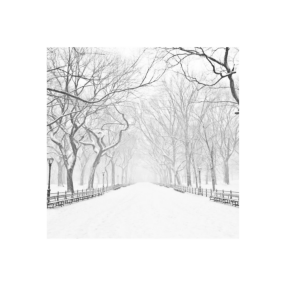

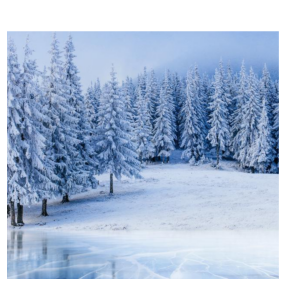

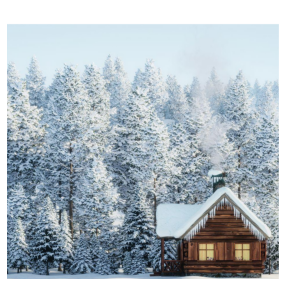

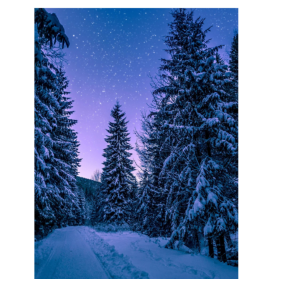

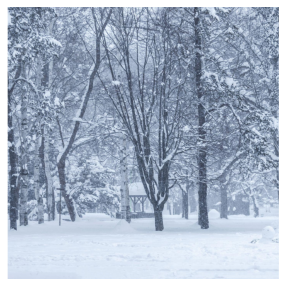

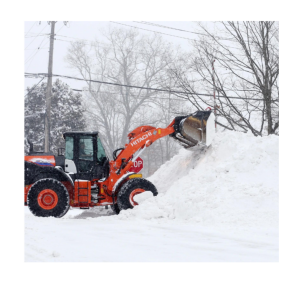

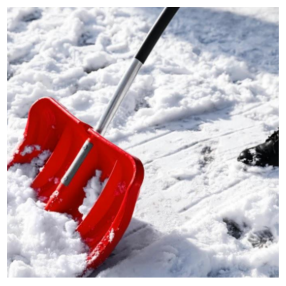

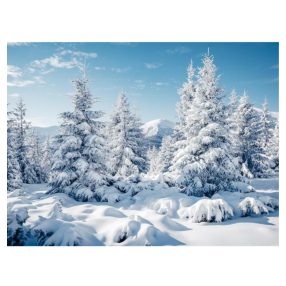

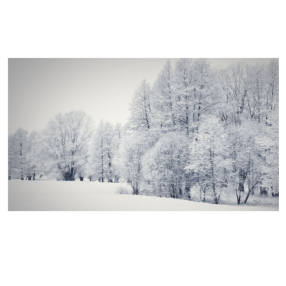

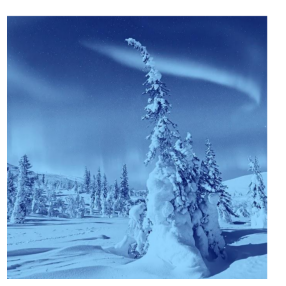

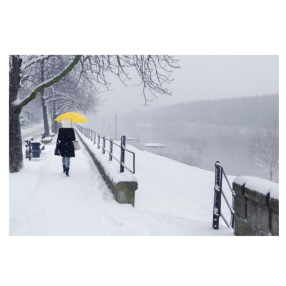

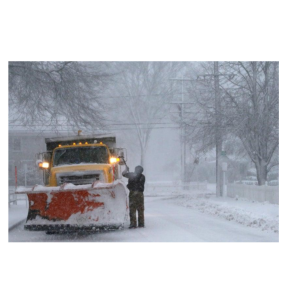

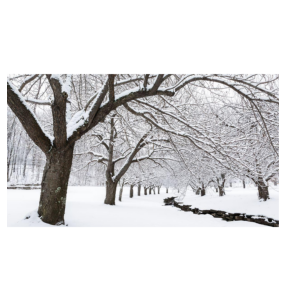

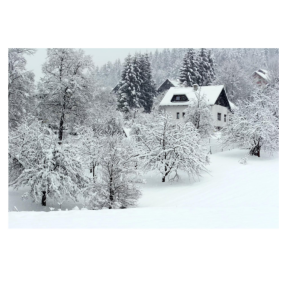

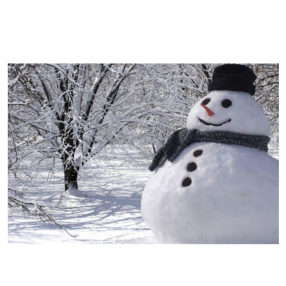

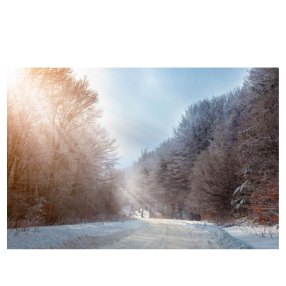

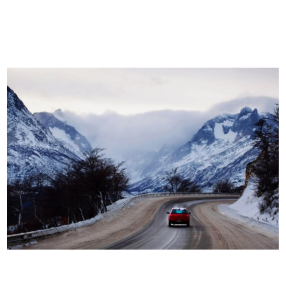

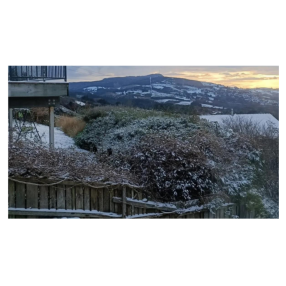

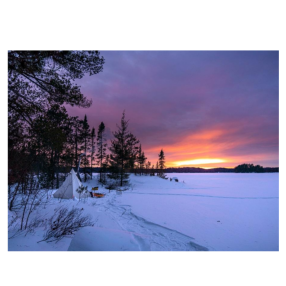

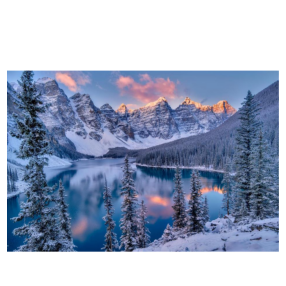

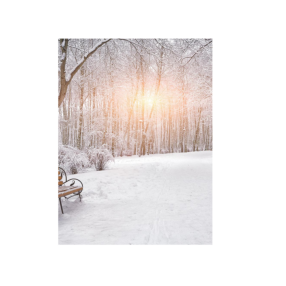

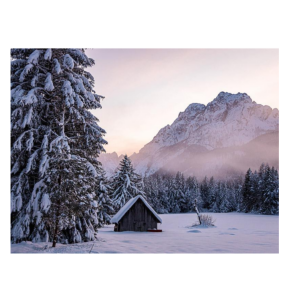

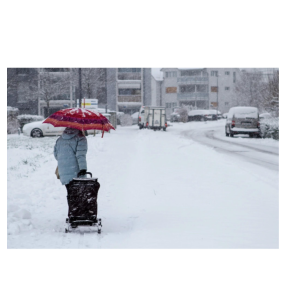

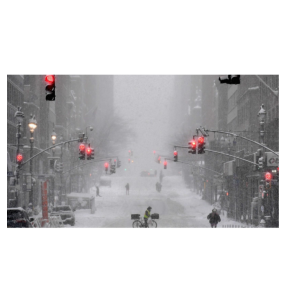

In [59]:
images = []                                                                     #getting the images from the url and loading them into here

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [60]:
images.shape                                                                    #it is 50 pictures and it shows the sizes of the images

torch.Size([50, 3, 224, 224])

In [61]:
model(images)                                                                   #the data from the 50 images

tensor([[ -0.9765,  -1.3319,   1.9558,  ...,  -3.8286,  -0.1006,   2.8993],
        [  2.5183,   0.2943,  -3.2559,  ...,  -3.2426,   1.9202,  -2.2261],
        [ -2.4999,  -2.9795,  -2.3077,  ...,  -3.5278,   0.9339,   1.7737],
        ...,
        [ -1.3441,  -5.4417,   0.7866,  ...,  -4.1879,   1.1733,   0.4203],
        [  0.6645,  -3.6780,  -1.3220,  ...,  -5.9791,  -1.0452,   0.9852],
        [ -2.0850,   4.3967,  -1.2031,  ..., -10.8848,  -3.5430,   0.5652]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [62]:
y = model(images)                                                               #setting y equal to the model of the images

In [63]:
y.shape                                                                         #showing the array of numbers that y is

torch.Size([50, 1000])

In [64]:
guesses = torch.argmax(y, 1).cpu().numpy()                                      #what the images might be based on the guesses that was already programmed

In [65]:
for i in list(guesses):                                                         #there are guesses as to what each photo was but it was not all correct
    print(labels[i])

seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
table lamp
web site, website, internet site, site
nipple
golden retriever
conch
umbrella
American lobster, Northern lobster, Maine lobster, Homarus americanus
seashore, coast, seacoast, sea-coast
barrow, garden cart, lawn cart, wheelbarrow
monitor
jigsaw puzzle
harvester, reaper
folding chair
seashore, coast, seacoast, sea-coast
umbrella
breakwater, groin, groyne, mole, bulwark, seawall, jetty
missile
Band Aid
dogsled, dog sled, dog sleigh
yurt
bucket, pail
binder, ring-binder
plate rack
snowmobile
barn
binder, ring-binder
dogsled, dog sled, dog sleigh
snowplow, snowplough
shovel
alp
barn
hair slide
ski
snowplow, snowplough
park bench
snowmobile
snowmobile
projectile, missile
alp
barn
lakeside, lakeshore
alp
window shade
barn
snowmobile
snowplow, snowplough


In [66]:
Y = np.zeros(50,)                                                               #this is used to create a new array using zeros
Y[25:] = 1

In [67]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [68]:
X = y.detach().cpu().numpy()                                                    #x is equal to this

In [69]:
X.shape                                                                         #the array but it is the number of rows

(50, 1000)

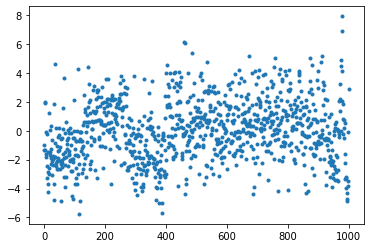

In [70]:
plt.plot(X[0],'.')                                                              #creating a scatterplot with the first rows

In [71]:
X[0]                                                                            #the number data from each row

array([-9.76542532e-01, -1.33185792e+00,  1.95579612e+00, -1.33695948e+00,
        1.94263077e+00, -1.64325488e+00, -1.04926147e-01, -1.83274472e+00,
       -2.43828440e+00, -2.06921577e-01, -3.26605558e+00, -4.26168299e+00,
       -3.72032523e+00, -1.44565165e+00, -2.86508322e+00, -2.59024572e+00,
       -3.02150059e+00,  1.21113467e+00,  7.12745488e-02, -1.49435604e+00,
       -1.71511030e+00, -2.29985571e+00,  3.46128106e-01, -1.26679826e+00,
       -1.91208482e+00, -2.06479406e+00, -3.08995557e+00, -6.36655271e-01,
       -1.97147048e+00, -2.40345144e+00, -1.71759665e+00, -3.70852518e+00,
       -4.78890944e+00,  1.87262440e+00,  4.61213350e+00, -1.85367131e+00,
       -8.42841268e-01, -1.84886479e+00, -2.46533418e+00,  1.59352660e-01,
       -2.22230482e+00, -2.61617279e+00, -2.09870172e+00, -1.08738005e+00,
       -1.40255213e+00, -2.64590740e+00, -1.88002992e+00, -4.15965259e-01,
       -3.15835059e-01,  1.54595733e-01, -1.33865821e+00, -1.09294081e+00,
       -2.63178015e+00, -

In [72]:
np.argmax(X[0])                                                                 #this is where the the function is maximized

978

In [73]:
labels                                                                          #a list of all the labels that there are 

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [74]:
labels[978]                                                                     #the label that best fits

'seashore, coast, seacoast, sea-coast'

In [75]:
top_ten = np.argsort(X[0])[::-1][0:10]                                          #creating an equation to show ten of the labels

In [76]:
for i in top_ten:                                                               #showing the top 10 labels from the long list
    print(labels[i])

seashore, coast, seacoast, sea-coast
sandbar, sand bar
breakwater, groin, groyne, mole, bulwark, seawall, jetty
bucket, pail
catamaran
wreck
mountain tent
trimaran
reel
lakeside, lakeshore


(array([ 13.,  63., 161., 214., 254., 164.,  88.,  38.,   3.,   2.]),
 array([-5.757795  , -4.3899274 , -3.0220604 , -1.654193  , -0.28632575,
         1.0815415 ,  2.4494088 ,  3.817276  ,  5.1851435 ,  6.5530105 ,
         7.920878  ], dtype=float32),
 <a list of 10 Patch objects>)

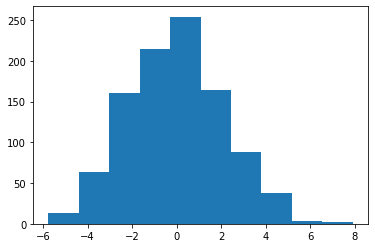

In [77]:
plt.hist(X[0])                                                                  #creating a histogram

In [78]:
X = GPU_data(X)                                                                 #defiing x and y
Y = GPU_data(Y)

In [79]:
def softmax(x):                                                                 #converting vector numbers into probabilities
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [80]:
def cross_entropy(outputs, labels):                                             #classifying the outputs and the labels
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [81]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [82]:
def Truncated_Normal(size):                                                     #computing the quantities with normal distribution

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [83]:
def acc(out,y):                                                                 #it is the training accuracy at the end of the run
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [84]:
X.shape                                                                         #the array that is x and it is the row

torch.Size([50, 1000])

In [85]:
def get_batch(mode):                                                            #the samples that are processed 
    b = c.b
    if mode == "train":                                                         #will measure the accuracy
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":                                                        #comparing two different groups which is the y and the x test
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [86]:
def model(x,w):                                                                 #creating a model with the data

    return x@w[0]

In [87]:
def make_plots():                                                               #creating a plot with the train and its acuracy
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [88]:
wb.init(project="Linear_Model_Photo_1");                                        #using an outside program to run and test the data sets
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-56-2dfb2f32f2e9>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [89]:
import pandas as pd                                                             #copied this code from the website so I could add in one of the graphs
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("annabohrer/Linear_Model_PhotoSet")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [90]:
run

<Run annabohrer/Linear_Model_PhotoSet/3ehrapoc (finished)>

The best was legenday-eon-4

The worst was atomic-armadillo-5

The average was 0.75415

In [91]:
url = "https://wandb.ai/annabohrer/Linear_Model_PhotoSet/reports/Linear-Photo-Data-Set-Report--VmlldzozMTEwMzI3/edit?firstReport=&runsetFilter"

In [92]:
url                                                                             #this is the link to the report of 4 runs to test the dataset of my images 

'https://wandb.ai/annabohrer/Linear_Model_PhotoSet/reports/Linear-Photo-Data-Set-Report--VmlldzozMTEwMzI3/edit?firstReport=&runsetFilter'